In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [ ]:
#Load the Datasets
df = pd.read_csv("Data Sheet/house_data.csv")
print("Letse see the Data of this Datasets......\n")
df.head()

Letse see the Data of this Datasets......



,House_ID,Area_sqft,Bedrooms,Bathrooms,Floors,Year_Built,City,Price
0,1,4110,2,1,2,2017,Delhi,4.698696e+06
1,2,2107,4,3,1,1980,Mumbai,3.899992e+06
2,3,1484,2,2,3,1983,Chennai,2.109576e+06
3,4,4176,3,1,2,2014,Delhi,5.450900e+06
4,5,3880,4,3,1,2002,Kolkata,6.328658e+06


In [6]:
#Shape of the dataset.
print(f"The Total Row of this dataset is {df.shape[0]} and thetotal columns of this dataset is {df.shape[1]}.")

The Total Row of this dataset is 2500 and thetotal columns of this dataset is 8.


In [7]:
#Check the null values
print("Let see there is any null values or not........\n")
df.isnull().sum()

Let see there is any null values or not........



House_ID      0
Area_sqft     0
Bedrooms      0
Bathrooms     0
Floors        0
Year_Built    0
City          0
Price         0
dtype: int64

In [8]:
#Describe the full dataset.
print("Lets Descibe the data of the all columns........\n")
df.describe(include='all')

Lets Descibe the data of the all columns........



,House_ID,Area_sqft,Bedrooms,Bathrooms,Floors,Year_Built,City,Price
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500,2.500000e+03
unique,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Mumbai,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,531,NaN
mean,1250.50000,2775.152400,3.014000,2.475200,1.97640,2000.832000,NaN,4.424360e+06
std,721.83216,1287.579146,1.410886,1.107193,0.82372,12.254919,NaN,1.700973e+06
min,1.00000,501.000000,1.000000,1.000000,1.00000,1980.000000,NaN,8.619286e+05
25%,625.75000,1635.000000,2.000000,1.750000,1.00000,1991.000000,NaN,2.985319e+06
50%,1250.50000,2844.000000,3.000000,2.000000,2.00000,2001.000000,NaN,4.418303e+06
75%,1875.25000,3914.000000,4.000000,3.000000,3.00000,2011.000000,NaN,5.737169e+06


In [9]:
#Input and Output
print("Lets select the Feture.......\n")
fetures = ["Area_sqft","Bedrooms","Bathrooms","Floors","Year_Built"]

x = df[fetures]
y = df[["Price"]]

#Train Model 
model1 = LinearRegression()

model1.fit(x,y)
predicted_price = model1.predict(x)

Lets select the Feture.......



In [10]:
#Velid Regression Matric
print("Lets see the Different parameters of this model.......\n")
mae = mean_absolute_error(y,predicted_price)
mse = mean_squared_error(y,predicted_price)
rmse = np.sqrt(mse)
r2_score = r2_score(y,predicted_price)

print("Mean Absolute Error(MAE):",round(mae,2))
print("Mean Squared Error(MSE):",round(mse,2))
print("Root Mean Squared Error(RMSE):",round(rmse,2))
print("R^2 Score:",round(r2_score,2))

Lets see the Different parameters of this model.......

Mean Absolute Error(MAE): 346796.42
Mean Squared Error(MSE): 197117021679.42
Root Mean Squared Error(RMSE): 443978.63
R^2 Score: 0.93


In [ ]:
with open("model/model.pkl","wb") as f:
    pickle.dump()

Distribution of the House Price...........



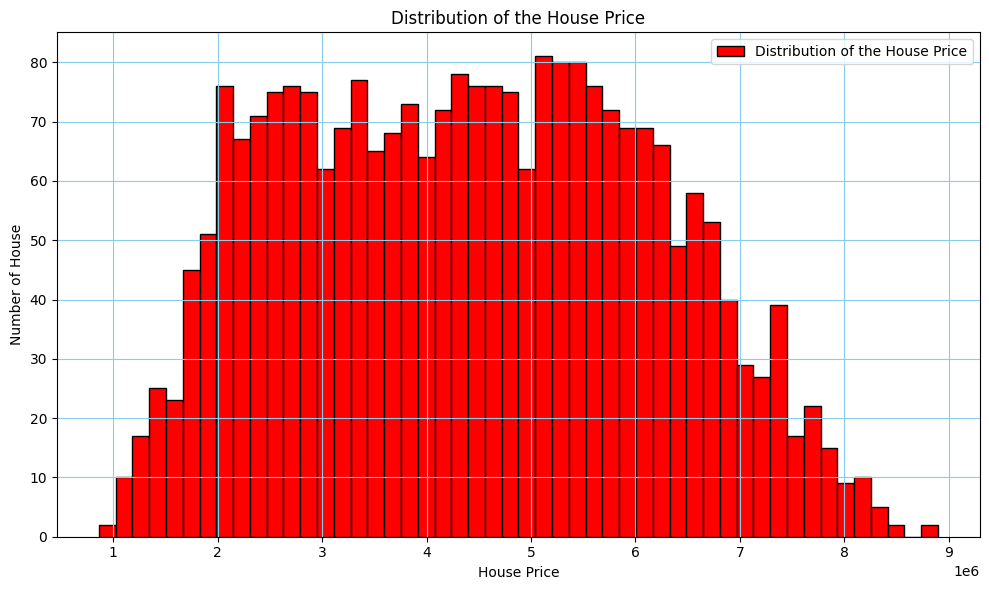

In [ ]:
#Histogram Chart
print("Distribution of the House Price...........\n")
plt.figure(figsize=(10,6))
plt.hist(df["Price"],bins=50,color="red",edgecolor="black",label="Distribution of the House Price")
plt.title("Distribution of the House Price")
plt.xlabel("House Price")
plt.ylabel("Number of House")
plt.grid(True,color="skyblue")
plt.tight_layout()
plt.legend(loc='upper right')
plt.savefig("Diagram images/Distribution_of_the_House_Price.png",dpi=400,bbox_inches='tight')
plt.show()

House Area VS House Price.......



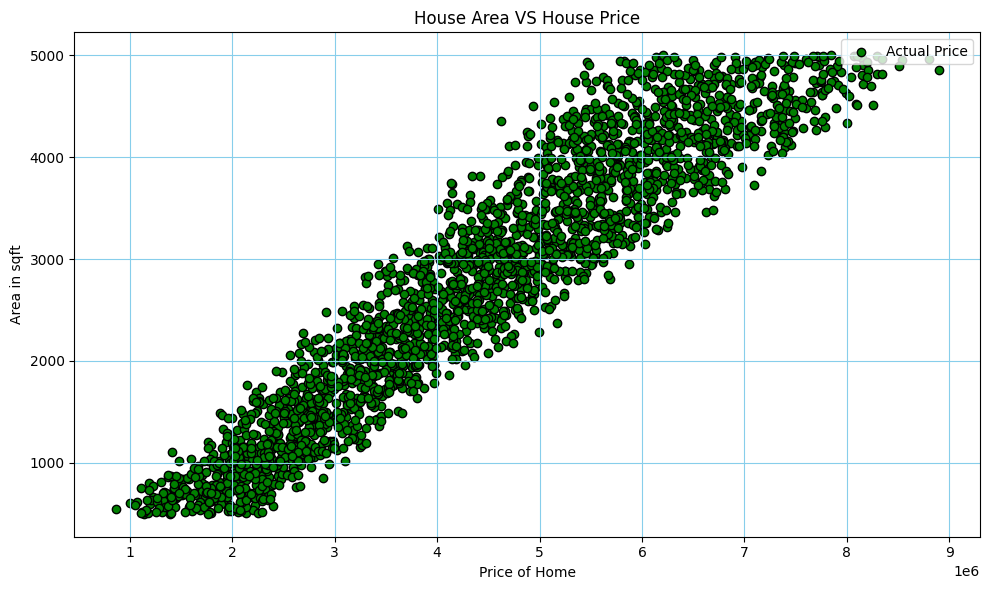

In [ ]:
#Scatter + Regression Line
print("House Area VS House Price.......\n")
plt.figure(figsize=(10,6))
plt.scatter(df[["Price"]],df[["Area_sqft"]],color="green",edgecolor="black",label="Actual Price")
plt.title("House Area VS House Price")
plt.xlabel("Price of Home")
plt.ylabel("Area in sqft")
plt.grid(True,color="skyblue")
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("Diagram images/House_Area_VS_House_Price.png",dpi=400,bbox_inches='tight')
plt.show()

Actual vs Predicted House Prices.......



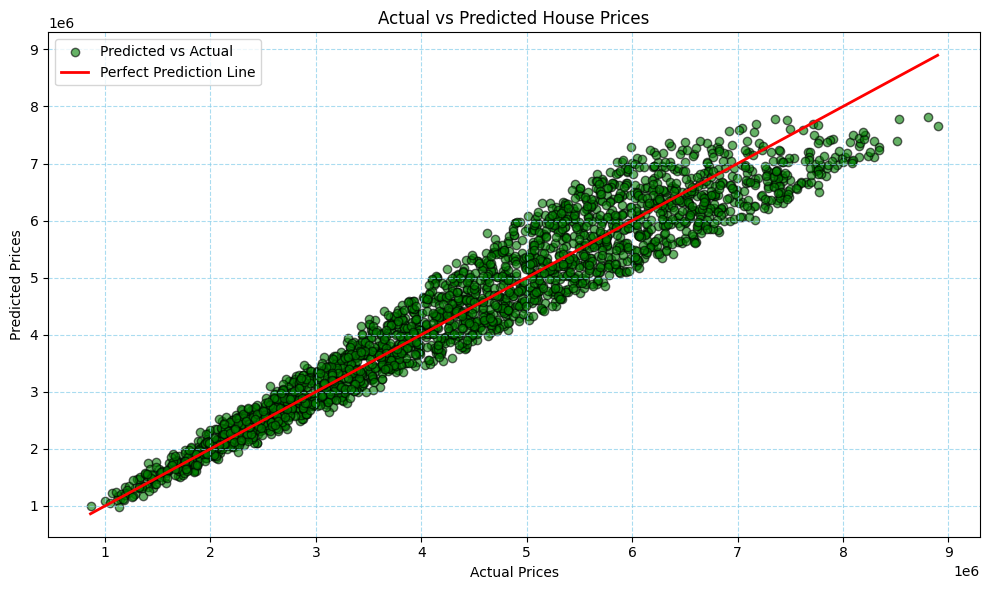

In [ ]:
# Actual vs Predicted Prices Chart
print("Actual vs Predicted House Prices.......\n")
plt.figure(figsize=(10,6))
plt.scatter(y, predicted_price, color="green", edgecolor="black", alpha=0.6, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="-", linewidth=2, label="Perfect Prediction Line")
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True, color="skyblue", linestyle="--", alpha=0.7)
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("Diagram images/Actual_vs_Predicted_House_Prices.png", dpi=400, bbox_inches="tight")
plt.show()

In [14]:
# Predict the Price of the house based on the area in sqft

x = df[["Area_sqft","Bedrooms","Bathrooms","Floors","Year_Built"]]
y = df[["Price"]]

#Train Model 
model1 = LinearRegression()

model1.fit(x,y)

Area_sqft = float(input("Enter the Area of the house(in sqft):"))
bedrooms = int(input("Enter the number of Bedrooms:"))
bathrooms = float(input("Enter the Bathroom:"))
floors = float(input("Enter the number of the floors:"))
year_built = int(input("Enter the build year of the House:"))

predicted_price = model1.predict([[Area_sqft,bedrooms,bathrooms,floors,year_built]])

print(f"Area of House is {Area_sqft} and bedrooms is {bedrooms} and bathrooms is {bathrooms} in the {floors} floor and the build year is {year_built} so accordingly this all the infotmation the predicted price of the house is {predicted_price[0][0]:,.2f}.")

Enter the Area of the house(in sqft): 1254
Enter the number of Bedrooms: 4
Enter the Bathroom: 2
Enter the number of the floors: 1
Enter the build year of the House: 2008


Area of House is 1254.0 and bedrooms is 4 and bathrooms is 2.0 in the 1.0 floor and the build year is 2008 so accordingly this all the infotmation the predicted price of the house is 2,663,663.09.


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
